In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [47]:
# read in unmasked null and measured results

# # null results for lowz bin only
# data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_null-EDR.npz')
# low_Nsat_total = data_Nsat_low['Nsat']
# null_Nsat_low35 = data_Nsat_low['low_nullNsat35']
# print(null_Nsat_low35.shape)

# # null results for midz bin only
# data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/mid_Nsat_null-EDR.npz')
# mid_Nsat_total = data_Nsat_mid['Nsat']
# null_Nsat_mid35 = data_Nsat_mid['mid_nullNsat35']
# null_Nsat_mid05 = data_Nsat_mid['mid_nullNsat05']
# print(null_Nsat_mid35.shape)
# print(null_Nsat_mid05.shape)

# null results for highz bin only
data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/high_Nsat_null-EDR.npz')
high_Nsat_total = data_Nsat_mid['Nsat']
null_Nsat_high35 = data_Nsat_mid['high_nullNsat35']
null_Nsat_high05 = data_Nsat_mid['high_nullNsat05']
null_Nsat_high65 = data_Nsat_mid['high_nullNsat65']
print(null_Nsat_high35.shape)
print(null_Nsat_high05.shape)
print(null_Nsat_high65.shape)


data_Nsat = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat-EDR.npz')
Nsat_total = data_Nsat['Nsat']
Nsat35 = data_Nsat['data_Nsat35']
Nsat05 = data_Nsat['data_Nsat05']
Nsat65 = data_Nsat['data_Nsat65']

print(Nsat_total.shape)
print(Nsat35.shape)
print(Nsat05.shape)
print(Nsat65.shape)



(862, 49, 49, 49)
(1721, 49, 49, 49)
(2417, 49, 49, 49)
(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [48]:
# read selection matrices

# read in selection matrices

# lowz
smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-EDR.npz')
low_smatrix = smatrix_low['smatrix']
smatrix_low35 = low_smatrix[0]
# print(smatrix_low35.shape)

# print()
# print()

# midz
smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-EDR.npz')
mid_smatrix = smatrix_mid['smatrix']
smatrix_mid35 = mid_smatrix[0]
smatrix_mid05 = mid_smatrix[1]
# print(smatrix_mid35.shape)
# print(smatrix_mid05.shape)

# print()
# print()

# highz
smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-EDR.npz')
high_smatrix = smatrix_high['smatrix']
smatrix_high35 = high_smatrix[0]
smatrix_high05 = high_smatrix[1]
smatrix_high65 = high_smatrix[2]
# print(smatrix_high35.shape)
# print(smatrix_high05.shape)
# print(smatrix_high65.shape)

In [49]:
# mask data and null

# apply masks

# data
masked_Nsat35 = []
for i in range(len(Nsat35)):
    masked_Nsat35.append(Nsat35[i] * smatrix_high35)

print(np.asarray(masked_Nsat35).shape)

masked_Nsat05 = []
for i in range(len(Nsat05)):
    masked_Nsat05.append(Nsat05[i] * smatrix_high05)

print(np.asarray(masked_Nsat05).shape)

masked_Nsat65 = []
for i in range(len(Nsat65)):
    masked_Nsat65.append(Nsat65[i] * smatrix_high65)

print(np.asarray(masked_Nsat05).shape)



# null
masked_Nsat_null35 = []
for i in range(len(null_Nsat_high35)):
    masked_Nsat_null35.append(null_Nsat_high35[i] * smatrix_high35)
    
print(np.asarray(masked_Nsat_null35).shape)

masked_Nsat_null05 = []
for i in range(len(null_Nsat_high05)):
    masked_Nsat_null05.append(null_Nsat_high05[i] * smatrix_high05)
    
print(np.asarray(masked_Nsat_null05).shape)

masked_Nsat_null65 = []
for i in range(len(null_Nsat_high65)):
    masked_Nsat_null65.append(null_Nsat_high65[i] * smatrix_high65)
    
print(np.asarray(masked_Nsat_null65).shape)



(309, 49, 49, 49)
(617, 49, 49, 49)
(617, 49, 49, 49)
(862, 49, 49, 49)
(1721, 49, 49, 49)
(2417, 49, 49, 49)


In [50]:
# read in models

# # lowz models are masked

# data1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model1_Nsat35-masked-EDR.npz')
# masked_Nsat1 = data1['masked_Nsat_low35_mod1']

# print(masked_Nsat1.shape)

# data2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model2_Nsat35-masked-EDR.npz')
# masked_Nsat2 = data2['masked_Nsat_low35_mod2']

# print(masked_Nsat2.shape)

# data3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model3_Nsat35-masked-EDR.npz')
# masked_Nsat3 = data3['masked_Nsat_low35_mod3']

# print(masked_Nsat3.shape)

# data4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model4_Nsat35-masked-EDR.npz')
# masked_Nsat4 = data4['masked_Nsat_low35_mod4']

# print(masked_Nsat4.shape)

# data5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model5_Nsat35-masked-EDR.npz')
# masked_Nsat5 = data5['masked_Nsat_low35_mod5']

# print(masked_Nsat5.shape)

# data6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model6_Nsat35-masked-EDR.npz')
# masked_Nsat6 = data6['masked_Nsat_low35_mod6']

# print(masked_Nsat6.shape)

# data7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model7_Nsat35-masked-EDR.npz')
# masked_Nsat7 = data7['masked_Nsat_low35_mod7']

# print(masked_Nsat7.shape)

# data8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/low_model8_Nsat35-masked-EDR.npz')
# masked_Nsat8 = data8['masked_Nsat_low35_mod8']

# print(masked_Nsat8.shape)



# # mid35 models are masked

# data_mid35_1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model1_Nsat35-masked-EDR.npz')
# masked_Nsat35_1 = data_mid35_1['masked_Nsat_mid35_mod1']

# print(masked_Nsat35_1.shape)

# data_mid35_2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model2_Nsat35-masked-EDR.npz')
# masked_Nsat35_2 = data_mid35_2['masked_Nsat_mid35_mod2']

# print(masked_Nsat35_2.shape)

# data_mid35_3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model3_Nsat35-masked-EDR.npz')
# masked_Nsat35_3 = data_mid35_3['masked_Nsat_mid35_mod3']

# print(masked_Nsat35_3.shape)

# data_mid35_4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model4_Nsat35-masked-EDR.npz')
# masked_Nsat35_4 = data_mid35_4['masked_Nsat_mid35_mod4']

# print(masked_Nsat35_4.shape)

# data_mid35_5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model5_Nsat35-masked-EDR.npz')
# masked_Nsat35_5 = data_mid35_5['masked_Nsat_mid35_mod5']

# print(masked_Nsat35_5.shape)

# data_mid35_6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model6_Nsat35-masked-EDR.npz')
# masked_Nsat35_6 = data_mid35_6['masked_Nsat_mid35_mod6']

# print(masked_Nsat35_6.shape)

# data_mid35_7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model7_Nsat35-masked-EDR.npz')
# masked_Nsat35_7 = data_mid35_7['masked_Nsat_mid35_mod7']

# print(masked_Nsat35_7.shape)

# data_mid35_8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model8_Nsat35-masked-EDR.npz')
# masked_Nsat35_8 = data_mid35_8['masked_Nsat_mid35_mod8']

# print(masked_Nsat35_8.shape)


# # mid05 models are masked

# data_mid05_1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model1_Nsat05-masked-EDR.npz')
# masked_Nsat05_1 = data_mid05_1['masked_Nsat_mid05_mod1']

# print(masked_Nsat05_1.shape)

# data_mid05_2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model2_Nsat05-masked-EDR.npz')
# masked_Nsat05_2 = data_mid05_2['masked_Nsat_mid05_mod2']

# print(masked_Nsat05_2.shape)

# data_mid05_3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model3_Nsat05-masked-EDR.npz')
# masked_Nsat05_3 = data_mid05_3['masked_Nsat_mid05_mod3']

# print(masked_Nsat05_3.shape)

# data_mid05_4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model4_Nsat05-masked-EDR.npz')
# masked_Nsat05_4 = data_mid05_4['masked_Nsat_mid05_mod4']

# print(masked_Nsat05_4.shape)

# data_mid05_5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model5_Nsat05-masked-EDR.npz')
# masked_Nsat05_5 = data_mid05_5['masked_Nsat_mid05_mod5']

# print(masked_Nsat05_5.shape)

# data_mid05_6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model6_Nsat05-masked-EDR.npz')
# masked_Nsat05_6 = data_mid05_6['masked_Nsat_mid05_mod6']

# print(masked_Nsat05_6.shape)

# data_mid05_7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model7_Nsat05-masked-EDR.npz')
# masked_Nsat05_7 = data_mid05_7['masked_Nsat_mid05_mod7']

# print(masked_Nsat05_7.shape)

# data_mid05_8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/mid_model8_Nsat05-masked-EDR.npz')
# masked_Nsat05_8 = data_mid05_8['masked_Nsat_mid05_mod8']

# print(masked_Nsat05_8.shape)


# high35 models are masked

data_high35_1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model1_Nsat35-masked-EDR.npz')
masked_Nsat35_1 = data_high35_1['masked_Nsat_high35_mod1']

print(masked_Nsat35_1.shape)

data_high35_2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model2_Nsat35-masked-EDR.npz')
masked_Nsat35_2 = data_high35_2['masked_Nsat_high35_mod2']

print(masked_Nsat35_2.shape)

data_high35_3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model3_Nsat35-masked-EDR.npz')
masked_Nsat35_3 = data_high35_3['masked_Nsat_high35_mod3']

print(masked_Nsat35_3.shape)

data_high35_4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model4_Nsat35-masked-EDR.npz')
masked_Nsat35_4 = data_high35_4['masked_Nsat_high35_mod4']

print(masked_Nsat35_4.shape)

data_high35_5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model5_Nsat35-masked-EDR.npz')
masked_Nsat35_5 = data_high35_5['masked_Nsat_high35_mod5']

print(masked_Nsat35_5.shape)

data_high35_6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model6_Nsat35-masked-EDR.npz')
masked_Nsat35_6 = data_high35_6['masked_Nsat_high35_mod6']

print(masked_Nsat35_6.shape)

data_high35_7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model7_Nsat35-masked-EDR.npz')
masked_Nsat35_7 = data_high35_7['masked_Nsat_high35_mod7']

print(masked_Nsat35_7.shape)

data_high35_8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model8_Nsat35-masked-EDR.npz')
masked_Nsat35_8 = data_high35_8['masked_Nsat_high35_mod8']

print(masked_Nsat35_8.shape)

# high05 models are masked

data_high05_1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model1_Nsat05-masked-EDR.npz')
masked_Nsat05_1 = data_high05_1['masked_Nsat_high05_mod1']

print(masked_Nsat05_1.shape)

data_high05_2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model2_Nsat05-masked-EDR.npz')
masked_Nsat05_2 = data_high05_2['masked_Nsat_high05_mod2']

print(masked_Nsat05_2.shape)

data_high05_3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model3_Nsat05-masked-EDR.npz')
masked_Nsat05_3 = data_high05_3['masked_Nsat_high05_mod3']

print(masked_Nsat05_3.shape)

data_high05_4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model4_Nsat05-masked-EDR.npz')
masked_Nsat05_4 = data_high05_4['masked_Nsat_high05_mod4']

print(masked_Nsat05_4.shape)

data_high05_5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model5_Nsat05-masked-EDR.npz')
masked_Nsat05_5 = data_high05_5['masked_Nsat_high05_mod5']

print(masked_Nsat05_5.shape)

data_high05_6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model6_Nsat05-masked-EDR.npz')
masked_Nsat05_6 = data_high05_6['masked_Nsat_high05_mod6']

print(masked_Nsat05_6.shape)

data_high05_7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model7_Nsat05-masked-EDR.npz')
masked_Nsat05_7 = data_high05_7['masked_Nsat_high05_mod7']

print(masked_Nsat05_7.shape)

data_high05_8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model8_Nsat05-masked-EDR.npz')
masked_Nsat05_8 = data_high05_8['masked_Nsat_high05_mod8']

print(masked_Nsat05_8.shape)

# high65 models are masked

data_high65_1 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model1_Nsat65-masked-EDR.npz')
masked_Nsat65_1 = data_high65_1['masked_Nsat_high65_mod1']

print(masked_Nsat65_1.shape)

data_high65_2 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model2_Nsat65-masked-EDR.npz')
masked_Nsat65_2 = data_high65_2['masked_Nsat_high65_mod2']

print(masked_Nsat65_2.shape)

data_high65_3 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model3_Nsat65-masked-EDR.npz')
masked_Nsat65_3 = data_high65_3['masked_Nsat_high65_mod3']

print(masked_Nsat65_3.shape)

data_high65_4 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model4_Nsat65-masked-EDR.npz')
masked_Nsat65_4 = data_high65_4['masked_Nsat_high65_mod4']

print(masked_Nsat65_4.shape)

data_high65_5 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model5_Nsat65-masked-EDR.npz')
masked_Nsat65_5 = data_high65_5['masked_Nsat_high65_mod5']

print(masked_Nsat65_5.shape)

data_high65_6 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model6_Nsat65-masked-EDR.npz')
masked_Nsat65_6 = data_high65_6['masked_Nsat_high65_mod6']

print(masked_Nsat65_6.shape)

data_high65_7 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model7_Nsat65-masked-EDR.npz')
masked_Nsat65_7 = data_high65_7['masked_Nsat_high65_mod7']

print(masked_Nsat65_7.shape)

data_high65_8 = np.load('/Users/mtownsend/Documents/LRG_Data/models/high_model8_Nsat65-masked-EDR.npz')
masked_Nsat65_8 = data_high65_8['masked_Nsat_high65_mod8']

print(masked_Nsat65_8.shape)



(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(862, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(1721, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)
(2417, 49, 49, 49)


In [51]:
# sum data, null, and models for use in plots and statistical comparisons

# data

sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35)):
    sum35.append(np.sum(masked_Nsat35[i]))
    
mean35 = np.mean(sum35)
print("mean number of satellites is", mean35)
median35 = np.median(sum35)
print("median number of satellites is", median35)

sum05 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05)):
    sum05.append(np.sum(masked_Nsat05[i]))
    
mean05 = np.mean(sum05)
print("mean number of satellites is", mean05)
median05 = np.median(sum05)
print("median number of satellites is", median35)

sum65 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65)):
    sum65.append(np.sum(masked_Nsat65[i]))
    
mean65 = np.mean(sum65)
print("mean number of satellites is", mean65)
median65 = np.median(sum65)
# print("median number of satellites is", median65)


# null

null_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat_null35)):
    null_sum35.append(np.sum(masked_Nsat_null35[i]))
    
null_mean35 = np.mean(null_sum35)
print("mean number of satellites is", null_mean35)
null_median35 = np.median(null_sum35)
# print("median number of satellites is", null_median35)

null_sum05 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat_null05)):
    null_sum05.append(np.sum(masked_Nsat_null05[i]))
    
null_mean05 = np.mean(null_sum05)
print("mean number of satellites is", null_mean05)
null_median05 = np.median(null_sum05)
# print("median number of satellites is", null_median35)

null_sum65 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat_null65)):
    null_sum65.append(np.sum(masked_Nsat_null65[i]))
    
null_mean65 = np.mean(null_sum65)
print("mean number of satellites is", null_mean65)
null_median65 = np.median(null_sum65)
# print("median number of satellites is", null_median65)


# models

# # lowz models

# sum35_mod1 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat1)):
#     sum35_mod1.append(np.sum(masked_Nsat1[i]))
    
# mean35_mod1 = np.mean(sum35_mod1)
# print("mean number of satellites is", mean35_mod1)
# median35_mod1 = np.median(sum35_mod1)
# # print("median number of satellites is", low_median35_mod1)


# sum35_mod2 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat2)):
#     sum35_mod2.append(np.sum(masked_Nsat2[i]))
    
# mean35_mod2 = np.mean(sum35_mod2)
# print("mean number of satellites is", mean35_mod2)
# median35_mod2 = np.median(sum35_mod2)
# # print("median number of satellites is", low_median35_mod2)


# sum35_mod3 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat3)):
#     sum35_mod3.append(np.sum(masked_Nsat3[i]))
    
# mean35_mod3 = np.mean(sum35_mod3)
# print("mean number of satellites is", mean35_mod3)
# median35_mod3 = np.median(sum35_mod3)
# # print("median number of satellites is", low_median35_mod3)


# sum35_mod4 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat4)):
#     sum35_mod4.append(np.sum(masked_Nsat4[i]))
    
# mean35_mod4 = np.mean(sum35_mod4)
# print("mean number of satellites is", mean35_mod4)
# median35_mod4 = np.median(sum35_mod4)
# # print("median number of satellites is", low_median35_mod4)


# sum35_mod5 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat5)):
#     sum35_mod5.append(np.sum(masked_Nsat5[i]))
    
# mean35_mod5 = np.mean(sum35_mod5)
# print("mean number of satellites is", mean35_mod5)
# median35_mod5 = np.median(sum35_mod5)
# # print("median number of satellites is", low_median35_mod5)


# sum35_mod6 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat6)):
#     sum35_mod6.append(np.sum(masked_Nsat6[i]))
    
# mean35_mod6 = np.mean(low_sum35_mod6)
# print("mean number of satellites is", mean35_mod6)
# median35_mod6 = np.median(sum35_mod6)
# # print("median number of satellites is", low_median35_mod6)


# sum35_mod7 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat7)):
#     sum35_mod7.append(np.sum(masked_Nsat7[i]))
    
# mean35_mod7 = np.mean(low_sum35_mod7)
# print("mean number of satellites is", mean35_mod7)
# median35_mod7 = np.median(sum35_mod7)
# # print("median number of satellites is", low_median35_mod7)


# sum35_mod8 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat8)):
#     sum35_mod8.append(np.sum(masked_Nsat8[i]))
    
# mean35_mod8 = np.mean(low_sum35_mod8)
# print("mean number of satellites is", mean35_mod8)
# median35_mod8 = np.median(sum35_mod8)
# # print("median number of satellites is", low_median35_mod8)



# # mid35 models

# sum35_mod1 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_1)):
#     sum35_mod1.append(np.sum(masked_Nsat35_1[i]))
    
# mean35_mod1 = np.mean(sum35_mod1)
# print("mean number of satellites is", mean35_mod1)
# median35_mod1 = np.median(sum35_mod1)
# # print("median number of satellites is", mid_median35_mod1)


# sum35_mod2 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_2)):
#     sum35_mod2.append(np.sum(masked_Nsat35_2[i]))
    
# mean35_mod2 = np.mean(sum35_mod2)
# print("mean number of satellites is", mean35_mod2)
# median35_mod2 = np.median(sum35_mod2)
# # print("median number of satellites is", mid_median35_mod2)

# sum35_mod3 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_3)):
#     sum35_mod3.append(np.sum(masked_Nsat35_3[i]))

# mean35_mod3 = np.mean(sum35_mod3)
# print("mean number of satellites is", mean35_mod3)
# median35_mod3 = np.median(sum35_mod3)
# # print("median number of satellites is", mid_median35_mod3)

# sum35_mod4 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_4)):
#     sum35_mod4.append(np.sum(masked_Nsat35_4[i]))

# mean35_mod4 = np.mean(sum35_mod4)
# print("mean number of satellites is", mean35_mod4)
# median35_mod4 = np.median(sum35_mod4)
# # print("median number of satellites is", mid_median35_mod4)

# sum35_mod5 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_5)):
#     sum35_mod5.append(np.sum(masked_Nsat35_5[i]))

# mean35_mod5 = np.mean(sum35_mod5)
# print("mean number of satellites is", mean35_mod5)
# median35_mod5 = np.median(sum35_mod5)
# # print("median number of satellites is", mid_median35_mod5)

# sum35_mod6 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_6)):
#     sum35_mod6.append(np.sum(masked_Nsat35_6[i]))

# mean35_mod6 = np.mean(sum35_mod6)
# print("mean number of satellites is", mean35_mod6)
# median35_mod6 = np.median(sum35_mod6)
# # print("median number of satellites is", mid_median35_mod6)

# sum35_mod7 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_7)):
#     sum35_mod7.append(np.sum(masked_Nsat35_7[i]))

# mean35_mod7 = np.mean(sum35_mod7)
# print("mean number of satellites is", mean35_mod7)
# median35_mod7 = np.median(sum35_mod7)
# # print("median number of satellites is", mid_median35_mod7)

# sum35_mod8 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat35_8)):
#     sum35_mod8.append(np.sum(masked_Nsat35_8[i]))

# mean35_mod8 = np.mean(sum35_mod8)
# print("mean number of satellites is", mean35_mod8)
# median35_mod8 = np.median(sum35_mod8)
# # print("median number of satellites is", mid_median35_mod8)



# # mid05 models

# sum05_mod1 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_1)):
#     sum05_mod1.append(np.sum(masked_Nsat05_1[i]))
    
# mean05_mod1 = np.mean(sum05_mod1)
# print("mean number of satellites is", mean05_mod1)
# median05_mod1 = np.median(sum05_mod1)
# # print("median number of satellites is", mid_median05_mod1)

# sum05_mod2 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_2)):
#     sum05_mod2.append(np.sum(masked_Nsat05_2[i]))

# mean05_mod2 = np.mean(sum05_mod2)
# print("mean number of satellites is", mean05_mod2)
# median05_mod2 = np.median(sum05_mod2)
# # print("median number of satellites is", mid_median05_mod2)

# sum05_mod3 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_3)):
#     sum05_mod3.append(np.sum(masked_Nsat05_3[i]))

# mean05_mod3 = np.mean(sum05_mod3)
# print("mean number of satellites is", mean05_mod3)
# median05_mod3 = np.median(sum05_mod3)
# # print("median number of satellites is", mid_median05_mod3)

# sum05_mod4 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_4)):
#     sum05_mod4.append(np.sum(masked_Nsat05_4[i]))

# mean05_mod4 = np.mean(sum05_mod4)
# print("mean number of satellites is", mean05_mod4)
# median05_mod4 = np.median(sum05_mod4)
# # print("median number of satellites is", mid_median05_mod4)

# sum05_mod5 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_5)):
#     sum05_mod5.append(np.sum(masked_Nsat05_5[i]))

# mean05_mod5 = np.mean(sum05_mod5)
# print("mean number of satellites is", mean05_mod5)
# median05_mod5 = np.median(sum05_mod5)
# # print("median number of satellites is", mid_median05_mod5)

# sum05_mod6 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_6)):
#     sum05_mod6.append(np.sum(masked_Nsat05_6[i]))

# mean05_mod6 = np.mean(sum05_mod6)
# print("mean number of satellites is", mean05_mod6)
# median05_mod6 = np.median(sum05_mod6)
# # print("median number of satellites is", mid_median05_mod6)

# sum05_mod7 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_7)):
#     sum05_mod7.append(np.sum(masked_Nsat05_7[i]))

# mean05_mod7 = np.mean(sum05_mod7)
# print("mean number of satellites is", mean05_mod7)
# median05_mod7 = np.median(sum05_mod7)
# # print("median number of satellites is", mid_median05_mod7)

# sum05_mod8 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(masked_Nsat05_8)):
#     sum05_mod8.append(np.sum(masked_Nsat05_8[i]))

# mean05_mod8 = np.mean(sum05_mod8)
# print("mean number of satellites is", mean05_mod8)
# median05_mod8 = np.median(sum05_mod8)
# # print("median number of satellites is", mid_median05_mod8)


# high35 models

sum35_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_1)):
    sum35_mod1.append(np.sum(masked_Nsat35_1[i]))
    
mean35_mod1 = np.mean(sum35_mod1)
print("mean number of satellites is", mean35_mod1)
median35_mod1 = np.median(sum35_mod1)
# print("median number of satellites is", mid_median35_mod1)


sum35_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_2)):
    sum35_mod2.append(np.sum(masked_Nsat35_2[i]))
    
mean35_mod2 = np.mean(sum35_mod2)
print("mean number of satellites is", mean35_mod2)
median35_mod2 = np.median(sum35_mod2)
# print("median number of satellites is", mid_median35_mod2)

sum35_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_3)):
    sum35_mod3.append(np.sum(masked_Nsat35_3[i]))

mean35_mod3 = np.mean(sum35_mod3)
print("mean number of satellites is", mean35_mod3)
median35_mod3 = np.median(sum35_mod3)
# print("median number of satellites is", mid_median35_mod3)

sum35_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_4)):
    sum35_mod4.append(np.sum(masked_Nsat35_4[i]))

mean35_mod4 = np.mean(sum35_mod4)
print("mean number of satellites is", mean35_mod4)
median35_mod4 = np.median(sum35_mod4)
# print("median number of satellites is", mid_median35_mod4)

sum35_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_5)):
    sum35_mod5.append(np.sum(masked_Nsat35_5[i]))

mean35_mod5 = np.mean(sum35_mod5)
print("mean number of satellites is", mean35_mod5)
median35_mod5 = np.median(sum35_mod5)
# print("median number of satellites is", mid_median35_mod5)

sum35_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_6)):
    sum35_mod6.append(np.sum(masked_Nsat35_6[i]))

mean35_mod6 = np.mean(sum35_mod6)
print("mean number of satellites is", mean35_mod6)
median35_mod6 = np.median(sum35_mod6)
# print("median number of satellites is", mid_median35_mod6)

sum35_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_7)):
    sum35_mod7.append(np.sum(masked_Nsat35_7[i]))

mean35_mod7 = np.mean(sum35_mod7)
print("mean number of satellites is", mean35_mod7)
median35_mod7 = np.median(sum35_mod7)
# print("median number of satellites is", mid_median35_mod7)

sum35_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35_8)):
    sum35_mod8.append(np.sum(masked_Nsat35_8[i]))

mean35_mod8 = np.mean(sum35_mod8)
print("mean number of satellites is", mean35_mod8)
median35_mod8 = np.median(sum35_mod8)
# print("median number of satellites is", mid_median35_mod8)



# high05 models

sum05_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_1)):
    sum05_mod1.append(np.sum(masked_Nsat05_1[i]))
    
mean05_mod1 = np.mean(sum05_mod1)
print("mean number of satellites is", mean05_mod1)
median05_mod1 = np.median(sum05_mod1)
# print("median number of satellites is", mid_median05_mod1)

sum05_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_2)):
    sum05_mod2.append(np.sum(masked_Nsat05_2[i]))

mean05_mod2 = np.mean(sum05_mod2)
print("mean number of satellites is", mean05_mod2)
median05_mod2 = np.median(sum05_mod2)
# print("median number of satellites is", mid_median05_mod2)

sum05_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_3)):
    sum05_mod3.append(np.sum(masked_Nsat05_3[i]))

mean05_mod3 = np.mean(sum05_mod3)
print("mean number of satellites is", mean05_mod3)
median05_mod3 = np.median(sum05_mod3)
# print("median number of satellites is", mid_median05_mod3)

sum05_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_4)):
    sum05_mod4.append(np.sum(masked_Nsat05_4[i]))

mean05_mod4 = np.mean(sum05_mod4)
print("mean number of satellites is", mean05_mod4)
median05_mod4 = np.median(sum05_mod4)
# print("median number of satellites is", mid_median05_mod4)

sum05_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_5)):
    sum05_mod5.append(np.sum(masked_Nsat05_5[i]))

mean05_mod5 = np.mean(sum05_mod5)
print("mean number of satellites is", mean05_mod5)
median05_mod5 = np.median(sum05_mod5)
# print("median number of satellites is", mid_median05_mod5)

sum05_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_6)):
    sum05_mod6.append(np.sum(masked_Nsat05_6[i]))

mean05_mod6 = np.mean(sum05_mod6)
print("mean number of satellites is", mean05_mod6)
median05_mod6 = np.median(sum05_mod6)
# print("median number of satellites is", mid_median05_mod6)

sum05_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_7)):
    sum05_mod7.append(np.sum(masked_Nsat05_7[i]))

mean05_mod7 = np.mean(sum05_mod7)
print("mean number of satellites is", mean05_mod7)
median05_mod7 = np.median(sum05_mod7)
# print("median number of satellites is", mid_median05_mod7)

sum05_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat05_8)):
    sum05_mod8.append(np.sum(masked_Nsat05_8[i]))

mean05_mod8 = np.mean(sum05_mod8)
print("mean number of satellites is", mean05_mod8)
median05_mod8 = np.median(sum05_mod8)
# print("median number of satellites is", mid_median05_mod8)


# high65 models

sum65_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_1)):
    sum65_mod1.append(np.sum(masked_Nsat65_1[i]))
    
mean65_mod1 = np.mean(sum65_mod1)
print("mean number of satellites is", mean65_mod1)
median65_mod1 = np.median(sum65_mod1)
# print("median number of satellites is", mid_median05_mod1)

sum65_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_2)):
    sum65_mod2.append(np.sum(masked_Nsat65_2[i]))

mean65_mod2 = np.mean(sum65_mod2)
print("mean number of satellites is", mean65_mod2)
median65_mod2 = np.median(sum65_mod2)
# print("median number of satellites is", mid_median05_mod2)

sum65_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_3)):
    sum65_mod3.append(np.sum(masked_Nsat65_3[i]))

mean65_mod3 = np.mean(sum65_mod3)
print("mean number of satellites is", mean65_mod3)
median65_mod3 = np.median(sum65_mod3)
# print("median number of satellites is", mid_median05_mod3)

sum65_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_4)):
    sum65_mod4.append(np.sum(masked_Nsat65_4[i]))

mean65_mod4 = np.mean(sum65_mod4)
print("mean number of satellites is", mean65_mod4)
median65_mod4 = np.median(sum65_mod4)
# print("median number of satellites is", mid_median05_mod4)

sum65_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_5)):
    sum65_mod5.append(np.sum(masked_Nsat65_5[i]))

mean65_mod5 = np.mean(sum65_mod5)
print("mean number of satellites is", mean65_mod5)
median65_mod5 = np.median(sum65_mod5)
# print("median number of satellites is", mid_median05_mod5)

sum65_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_6)):
    sum65_mod6.append(np.sum(masked_Nsat65_6[i]))

mean65_mod6 = np.mean(sum65_mod6)
print("mean number of satellites is", mean65_mod6)
median65_mod6 = np.median(sum65_mod6)
# print("median number of satellites is", mid_median05_mod6)

sum65_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_7)):
    sum65_mod7.append(np.sum(masked_Nsat65_7[i]))

mean65_mod7 = np.mean(sum65_mod7)
print("mean number of satellites is", mean65_mod7)
median65_mod7 = np.median(sum65_mod7)
# print("median number of satellites is", mid_median05_mod7)

sum65_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat65_8)):
    sum65_mod8.append(np.sum(masked_Nsat65_8[i]))

mean65_mod8 = np.mean(sum65_mod8)
print("mean number of satellites is", mean65_mod8)
median65_mod8 = np.median(sum65_mod8)
# print("median number of satellites is", mid_median05_mod8)




mean number of satellites is 0.6033217011060147
median number of satellites is 0.11811471627479905
mean number of satellites is 0.4499248398030621
median number of satellites is 0.11811471627479905
mean number of satellites is 1.3902609791520684
mean number of satellites is 0.24962143660782768
mean number of satellites is 0.3216797231549203
mean number of satellites is 0.8317231842352315
mean number of satellites is 0.6312919702505191
mean number of satellites is 1.5512455665382223
mean number of satellites is 2.6185309493688482
mean number of satellites is 3.492080833359568
mean number of satellites is 4.5384845456565515
mean number of satellites is 5.409714244032423
mean number of satellites is 6.63129197025052
mean number of satellites is 7.581407979531263
mean number of satellites is 2.0084897173443452
mean number of satellites is 3.01023288991843
mean number of satellites is 3.999773854473921
mean number of satellites is 5.025340385560499
mean number of satellites is 5.98582847388

In [18]:
# def totalNsat(Nsat, lum, z1, z2, string):

#     import matplotlib.pylab as plt 
#     import numpy as np
#     from scipy import stats
    
#     left, width = .25, .5
#     bottom, height = .25, .5
#     right = left + width
#     top = bottom + height


#     sumsat = []

#     # Sum up number of satellite galaxies for every LRG
#     for i in range(len(Nsat)):
#         sumsat.append(np.sum(Nsat[i]))

#     meansat = np.mean(sumsat)
#     print("mean number of satellites is", meansat)
    
#     mediansat = np.median(sumsat)
# #     print("median number of satellites is", mediansat)

#     sdsat = np.std(sumsat)
# #     print("standard deviation of satellites is", sdsat)

#     sterr = stats.sem(sumsat)
# #     print("standard error is", sterr)
    
#     eighty = np.percentile(sumsat, 80.)
# #     print("80th percentile = ", eighty)
#     ninety = np.percentile(sumsat, 90.)
# #     print("90th percentile = ", ninety)
#     ninetynine = np.percentile(sumsat, 99.)
# #     print("99th percentile = ", ninetynine)

# #     plt.rcParams["figure.figsize"] = [15, 8]
# #     fig = plt.figure()
# #     ax = fig.add_subplot(111)
# # #     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
# #     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}; ({})".format(lum, z1, z2, string), fontsize=18)
# #     plt.hist(sumsat, bins=50)
# #     plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=20)
# #     plt.ylabel(r'$counts$', fontsize=20)
# # #     plt.axvline(x=eighty, linewidth=1, ls='-', color='r')
# # #     plt.axvline(x=ninety, linewidth=1, ls='--', color='g')
# # #     plt.axvline(x=ninetynine, linewidth=1, ls=':', color='b')
# #     plt.text(top, right,'mean = {}'.format(meansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# #     plt.text(top, right-0.05,'median = {}'.format(mediansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# # #     plt.text(top, right-0.1,'99th = {}'.format(ninetynine), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# #     # plt.show()
#     return(sumsat)

In [52]:
# perform k-sample Anderson-Darling test on model distributions and data

from scipy import stats

# comparing null result to data

ad_stat35, crit_vals35, sig_level35 = stats.anderson_ksamp([null_sum35, sum35])
ad_stat05, crit_vals05, sig_level05 = stats.anderson_ksamp([null_sum05, sum05])
ad_stat65, crit_vals65, sig_level65 = stats.anderson_ksamp([null_sum65, sum65])


print('0.2 < 0.35')
print('----')
print(ad_stat35)
print(crit_vals35)
print(sig_level35)
print('----')

print('0.35 < 0.5')
print('----')
print(ad_stat05)
print(crit_vals05)
print(sig_level05)
print('----')

# print('0.5 < 0.65')
# print('----')
# print(ad_stat65)
# print(crit_vals65)
# print(sig_level65)
# print('----')

# comparing model to data

stat35_1, crit_vals35_1, sig_level35_1 = stats.anderson_ksamp([sum35_mod1, sum35])
stat35_2, crit_vals35_2, sig_level35_2 = stats.anderson_ksamp([sum35_mod2, sum35])
stat35_3, crit_vals35_3, sig_level35_3 = stats.anderson_ksamp([sum35_mod3, sum35])
stat35_4, crit_vals35_4, sig_level35_4 = stats.anderson_ksamp([sum35_mod4, sum35])
stat35_5, crit_vals35_5, sig_level35_5 = stats.anderson_ksamp([sum35_mod5, sum35])
stat35_6, crit_vals35_6, sig_level35_6 = stats.anderson_ksamp([sum35_mod6, sum35])
stat35_7, crit_vals35_7, sig_level35_7 = stats.anderson_ksamp([sum35_mod7, sum35])
stat35_8, crit_vals35_8, sig_level35_8 = stats.anderson_ksamp([sum35_mod8, sum35])

stat05_1, crit_vals05_1, sig_level05_1 = stats.anderson_ksamp([sum05_mod1, sum05])
stat05_2, crit_vals05_2, sig_level05_2 = stats.anderson_ksamp([sum05_mod2, sum05])
stat05_3, crit_vals05_3, sig_level05_3 = stats.anderson_ksamp([sum05_mod3, sum05])
stat05_4, crit_vals05_4, sig_level05_4 = stats.anderson_ksamp([sum05_mod4, sum05])
stat05_5, crit_vals05_5, sig_level05_5 = stats.anderson_ksamp([sum05_mod5, sum05])
stat05_6, crit_vals05_6, sig_level05_6 = stats.anderson_ksamp([sum05_mod6, sum05])
stat05_7, crit_vals05_7, sig_level05_7 = stats.anderson_ksamp([sum05_mod7, sum05])
stat05_8, crit_vals05_8, sig_level05_8 = stats.anderson_ksamp([sum05_mod8, sum05])

stat65_1, crit_vals65_1, sig_level65_1 = stats.anderson_ksamp([sum65_mod1, sum65])
stat65_2, crit_vals65_2, sig_level65_2 = stats.anderson_ksamp([sum65_mod2, sum65])
stat65_3, crit_vals65_3, sig_level65_3 = stats.anderson_ksamp([sum65_mod3, sum65])
stat65_4, crit_vals65_4, sig_level65_4 = stats.anderson_ksamp([sum65_mod4, sum65])
stat65_5, crit_vals65_5, sig_level65_5 = stats.anderson_ksamp([sum65_mod5, sum65])
stat65_6, crit_vals65_6, sig_level65_6 = stats.anderson_ksamp([sum65_mod6, sum65])
stat65_7, crit_vals65_7, sig_level65_7 = stats.anderson_ksamp([sum65_mod7, sum65])
stat65_8, crit_vals65_8, sig_level65_8 = stats.anderson_ksamp([sum65_mod8, sum65])


print('0.2 < 0.35')
print('----')
print('model 1')
print(stat35_1)
print(crit_vals35_1)
print(sig_level35_1)
print('----')

print('model 2')
print(stat35_2)
print(crit_vals35_2)
print(sig_level35_2)
print('----')

print('model 3')
print(stat35_3)
print(crit_vals35_3)
print(sig_level35_3)
print('----')

print('model 4')
print(stat35_4)
print(crit_vals35_4)
print(sig_level35_4)
print('----')

print('model 5')
print(stat35_5)
print(crit_vals35_5)
print(sig_level35_5)
print('----')

print('model 6')
print(stat35_6)
print(crit_vals35_6)
print(sig_level35_6)
print('----')

print('model 7')
print(stat35_7)
print(crit_vals35_7)
print(sig_level35_7)
print('----')

print('model 8')
print(stat35_8)
print(crit_vals35_8)
print(sig_level35_8)
print('----')

print()
print()


print('0.35 < 0.5')
print('----')
print('model 1')
print(stat05_1)
print(crit_vals05_1)
print(sig_level05_1)
print('----')

print('model 2')
print(stat05_2)
print(crit_vals05_2)
print(sig_level05_2)
print('----')

print('model 3')
print(stat05_3)
print(crit_vals05_3)
print(sig_level05_3)
print('----')

print('model 4')
print(stat05_4)
print(crit_vals05_4)
print(sig_level05_4)
print('----')

print('model 5')
print(stat05_5)
print(crit_vals05_5)
print(sig_level05_5)
print('----')

print('model 6')
print(stat05_6)
print(crit_vals05_6)
print(sig_level05_6)
print('----')

print('model 7')
print(stat05_7)
print(crit_vals05_7)
print(sig_level05_7)
print('----')

print('model 8')
print(stat05_8)
print(crit_vals05_8)
print(sig_level05_8)
print('----')

print()
print()

print('0.5 < 0.65')
print('----')
print('model 1')
print(stat65_1)
print(crit_vals65_1)
print(sig_level65_1)
print('----')

print('model 2')
print(stat65_2)
print(crit_vals65_2)
print(sig_level65_2)
print('----')

print('model 3')
print(stat65_3)
print(crit_vals65_3)
print(sig_level65_3)
print('----')

print('model 4')
print(stat65_4)
print(crit_vals65_4)
print(sig_level65_4)
print('----')

print('model 5')
print(stat65_5)
print(crit_vals65_5)
print(sig_level65_5)
print('----')

print('model 6')
print(stat65_6)
print(crit_vals65_6)
print(sig_level65_6)
print('----')

print('model 7')
print(stat65_7)
print(crit_vals65_7)
print(sig_level65_7)
print('----')

print('model 8')
print(stat65_8)
print(crit_vals65_8)
print(sig_level65_8)
print('----')



0.2 < 0.35
----
3.892625229344744
[0.325 1.226 1.961 2.718 3.752]
0.008904813436553922
----
0.35 < 0.5
----
1.7250556438552054
[0.325 1.226 1.961 2.718 3.752]
0.062388110641150823
----
0.2 < 0.35
----
model 1
4.870372967666033
[0.325 1.226 1.961 2.718 3.752]
0.0039997363376979515
----
model 2
46.15709980808994
[0.325 1.226 1.961 2.718 3.752]
124.15813135531364
----
model 3
143.2202753676426
[0.325 1.226 1.961 2.718 3.752]
1.5038102881390887e+160
----
model 4
216.74483816969453
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 5
293.2887854351291
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 6
340.2886951710745
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 7
392.8302399847795
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 8
424.90102073069556
[0.325 1.226 1.961 2.718 3.752]
inf
----


0.35 < 0.5
----
model 1
113.34427227315211
[0.325 1.226 1.961 2.718 3.752]
2.937070635263593e+89
----
model 2
254.25186902757858
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 3
416.4729052904655
[0.325 1.2

In [53]:
# perform k-sample K-S test on model distributions and data

from scipy import stats

ks_stat35, pval35 = stats.ks_2samp(null_sum35, sum35)
ks_stat05, pval05 = stats.ks_2samp(null_sum05, sum05)
ks_stat65, pval65 = stats.ks_2samp(null_sum05, sum05)

print('0.2 < 0.35')
print('----')
print(ks_stat35)
print(pval35)
print('----')

print('0.35 < 0.5')
print('----')
print(ks_stat05)
print(pval05)
print('----')

print('0.5 < 0.65')
print('----')
print(ks_stat65)
print(pval65)
print('----')

print()
print()

stat35_1, pval35_1 = stats.ks_2samp(sum35_mod1, sum35)
stat35_2, pval35_2 = stats.ks_2samp(sum35_mod2, sum35)
stat35_3, pval35_3 = stats.ks_2samp(sum35_mod3, sum35)
stat35_4, pval35_4 = stats.ks_2samp(sum35_mod4, sum35)
stat35_5, pval35_5 = stats.ks_2samp(sum35_mod5, sum35)
stat35_6, pval35_6 = stats.ks_2samp(sum35_mod6, sum35)
stat35_7, pval35_7 = stats.ks_2samp(sum35_mod7, sum35)
stat35_8, pval35_8 = stats.ks_2samp(sum35_mod8, sum35)

stat05_1, pval05_1 = stats.ks_2samp(sum05_mod1, sum05)
stat05_2, pval05_2 = stats.ks_2samp(sum05_mod2, sum05)
stat05_3, pval05_3 = stats.ks_2samp(sum05_mod3, sum05)
stat05_4, pval05_4 = stats.ks_2samp(sum05_mod4, sum05)
stat05_5, pval05_5 = stats.ks_2samp(sum05_mod5, sum05)
stat05_6, pval05_6 = stats.ks_2samp(sum05_mod6, sum05)
stat05_7, pval05_7 = stats.ks_2samp(sum05_mod7, sum05)
stat05_8, pval05_8 = stats.ks_2samp(sum05_mod8, sum05)

stat65_1, pval65_1 = stats.ks_2samp(sum65_mod1, sum65)
stat65_2, pval65_2 = stats.ks_2samp(sum65_mod2, sum65)
stat65_3, pval65_3 = stats.ks_2samp(sum65_mod3, sum65)
stat65_4, pval65_4 = stats.ks_2samp(sum65_mod4, sum65)
stat65_5, pval65_5 = stats.ks_2samp(sum65_mod5, sum65)
stat65_6, pval65_6 = stats.ks_2samp(sum65_mod6, sum65)
stat65_7, pval65_7 = stats.ks_2samp(sum65_mod7, sum65)
stat65_8, pval65_8 = stats.ks_2samp(sum65_mod8, sum65)

print('0.2 < 0.35')
print('----')
print('model 1')
print(stat35_1)
print(pval35_1)
print('----')

print('model 2')
print(stat35_2)
print(pval35_2)
print('----')

print('model 3')
print(stat35_3)
print(pval35_3)
print('----')

print('model 4')
print(stat35_4)
print(pval35_4)
print('----')

print('model 5')
print(stat35_5)
print(pval35_5)
print('----')

print('model 6')
print(stat35_6)
print(pval35_6)
print('----')

print('model 7')
print(stat35_7)
print(pval35_7)
print('----')

print('model 8')
print(stat35_8)
print(pval35_8)
print('----')

print()
print()

print('0.35 < 0.5')
print('----')
print('model 1')
print(stat05_1)
print(pval05_1)
print('----')

print('model 2')
print(stat05_2)
print(pval05_2)
print('----')

print('model 3')
print(stat05_3)
print(pval05_3)
print('----')

print('model 4')
print(stat05_4)
print(pval05_4)
print('----')

print('model 5')
print(stat05_5)
print(pval05_5)
print('----')

print('model 6')
print(stat05_6)
print(pval05_6)
print('----')

print('model 7')
print(stat05_7)
print(pval05_7)
print('----')

print('model 8')
print(stat05_8)
print(pval05_8)
print('----')

print()
print()

print('0.5 < 0.65')
print('----')
print('model 1')
print(stat65_1)
print(pval65_1)
print('----')

print('model 2')
print(stat65_2)
print(pval65_2)
print('----')

print('model 3')
print(stat65_3)
print(pval65_3)
print('----')

print('model 4')
print(stat65_4)
print(pval65_4)
print('----')

print('model 5')
print(stat65_5)
print(pval65_5)
print('----')

print('model 6')
print(stat65_6)
print(pval65_6)
print('----')

print('model 7')
print(stat65_7)
print(pval65_7)
print('----')

print('model 8')
print(stat65_8)
print(pval65_8)
print('----')




0.2 < 0.35
----
0.10931152809376854
0.007947551119183622
----
0.35 < 0.5
----
0.04945110311463785
0.21108758891697216
----
0.5 < 0.65
----
0.04945110311463785
0.21108758891697216
----


0.2 < 0.35
----
model 1
0.12934471650935958
0.0008702120375476962
----
model 2
0.2554419240270613
1.5519434289064838e-13
----
model 3
0.4378843511364405
5.971197212360444e-39
----
model 4
0.5363157855217413
3.2318063797349144e-58
----
model 5
0.6676540595739568
5.476257573083819e-90
----
model 6
0.7146096606822397
4.986068548957833e-103
----
model 7
0.7941679994593742
3.8031303604750756e-127
----
model 8
0.8333070529137477
6.052914224393095e-140
----


0.35 < 0.5
----
model 1
0.26657638457909116
8.652866462248769e-29
----
model 2
0.40785717850897063
8.04588239750632e-67
----
model 3
0.5207961147310796
1.1056701392532984e-108
----
model 4
0.6183497401250827
4.879668737579961e-153
----
model 5
0.6952320321851247
2.3936508333691916e-193
----
model 6
0.733548867691224
3.370965180713066e-215
----
model 7
0.7

In [46]:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15,25), sharex=True)
# fig.suptitle('Nsat Histograms for $log_{10}(L)=9.27$ and 0.2 < z < 0.35', fontsize=15)
# fig.subplots_adjust(top=0.93)
# ax1.hist(sum35, bins=100)
# ax1.set_title('Data', fontsize=14)
# # ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax1.set_ylabel(r'$counts$', fontsize=13)
# ax1.axvline(x=mean35, color='r')
# ax1.axvline(x=median35, color='black')
# ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
# ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

# ax2.hist(null_sum35, bins=100)
# ax2.set_title('Null', fontsize=14)
# # ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax2.set_ylabel(r'$counts$', fontsize=13)
# ax2.axvline(x=null_mean35, color='r')
# ax2.axvline(x=null_median35, color='black')
# ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
# ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
# ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)


# ax3.hist(sum35_mod1, bins=100)
# ax3.set_title('Model 1', fontsize=14)
# # ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=mean35_mod1, color='r')
# ax3.axvline(x=median35_mod1, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
# ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(sum35_mod2, bins=100)
# ax4.set_title('Model 2', fontsize=14)
# # ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax4.set_ylabel(r'$counts$', fontsize=13)
# ax4.axvline(x=mean35_mod2, color='r')
# ax4.axvline(x=median35_mod2, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
# ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


# ax5.hist(sum35_mod3, bins=100)
# ax5.set_title('Model 3', fontsize=14)
# # ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax5.set_ylabel(r'$counts$', fontsize=13)
# ax5.axvline(x=mean35_mod3, color='r')
# ax5.axvline(x=median35_mod3, color='black')
# ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
# ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
# ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

# ax6.hist(sum35_mod4, bins=100)
# ax6.set_title('Model 4', fontsize=14)
# # ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax6.set_ylabel(r'$counts$', fontsize=13)
# ax6.axvline(x=mean35_mod4, color='r')
# ax6.axvline(x=median35_mod4, color='black')
# ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
# ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
# ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

# ax7.hist(sum35_mod5, bins=100)
# ax7.set_title('Model 5', fontsize=14)
# # ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax7.set_ylabel(r'$counts$', fontsize=13)
# ax7.axvline(x=mean35_mod5, color='r')
# ax7.axvline(x=median35_mod5, color='black')
# ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
# ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
# ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

# ax8.hist(sum35_mod6, bins=100)
# ax8.set_title('Model 6', fontsize=14)
# # ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax8.set_ylabel(r'$counts$', fontsize=13)
# ax8.axvline(x=mean35_mod6, color='r')
# ax8.axvline(x=median35_mod6, color='black')
# ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
# ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
# ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

# ax9.hist(sum35_mod7, bins=100)
# ax9.set_title('Model 7', fontsize=14)
# # ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax9.set_ylabel(r'$counts$', fontsize=13)
# ax9.axvline(x=mean35_mod7, color='r')
# ax9.axvline(x=median35_mod7, color='black')
# ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
# ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
# ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

# ax10.hist(sum35_mod8, bins=100)
# ax10.set_title('Model 8', fontsize=14)
# ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
# ax10.set_ylabel(r'$counts$', fontsize=13)
# ax10.axvline(x=mean35_mod8, color='r')
# ax10.axvline(x=median35_mod8, color='black')
# ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
# ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
# ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/PaperPlots/lowz35-model-comparison-EDR.pdf')

# plt.show()

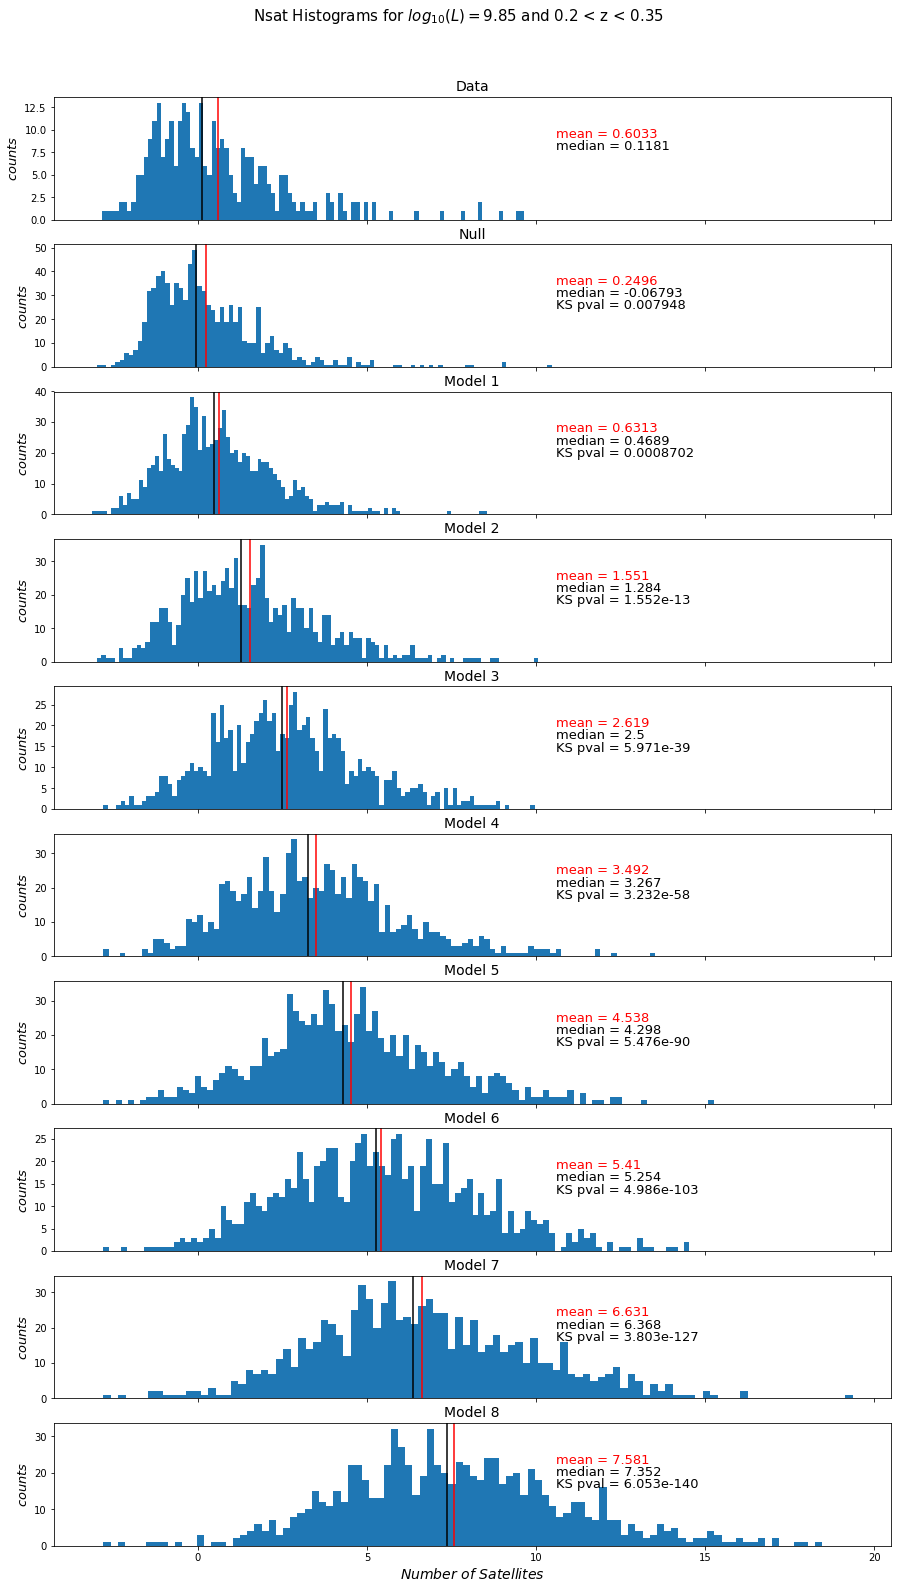

In [57]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15,25), sharex=True)
fig.suptitle('Nsat Histograms for $log_{10}(L)=9.85$ and 0.2 < z < 0.35', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(sum35, bins=100)
ax1.set_title('Data', fontsize=14)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=mean35, color='r')
ax1.axvline(x=median35, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(null_sum35, bins=100)
ax2.set_title('Null', fontsize=14)
# ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax2.set_ylabel(r'$counts$', fontsize=13)
ax2.axvline(x=null_mean35, color='r')
ax2.axvline(x=null_median35, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)


ax3.hist(sum35_mod1, bins=100)
ax3.set_title('Model 1', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax3.set_ylabel(r'$counts$', fontsize=13)
ax3.axvline(x=mean35_mod1, color='r')
ax3.axvline(x=median35_mod1, color='black')
ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

ax4.hist(sum35_mod2, bins=100)
ax4.set_title('Model 2', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax4.set_ylabel(r'$counts$', fontsize=13)
ax4.axvline(x=mean35_mod2, color='r')
ax4.axvline(x=median35_mod2, color='black')
ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)

ax5.hist(sum35_mod3, bins=100)
ax5.set_title('Model 3', fontsize=14)
# ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax5.set_ylabel(r'$counts$', fontsize=13)
ax5.axvline(x=mean35_mod3, color='r')
ax5.axvline(x=median35_mod3, color='black')
ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

ax6.hist(sum35_mod4, bins=100)
ax6.set_title('Model 4', fontsize=14)
# ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax6.set_ylabel(r'$counts$', fontsize=13)
ax6.axvline(x=mean35_mod4, color='r')
ax6.axvline(x=median35_mod4, color='black')
ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

ax7.hist(sum35_mod5, bins=100)
ax7.set_title('Model 5', fontsize=14)
# ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax7.set_ylabel(r'$counts$', fontsize=13)
ax7.axvline(x=mean35_mod5, color='r')
ax7.axvline(x=median35_mod5, color='black')
ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

ax8.hist(sum35_mod6, bins=100)
ax8.set_title('Model 6', fontsize=14)
# ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax8.set_ylabel(r'$counts$', fontsize=13)
ax8.axvline(x=mean35_mod6, color='r')
ax8.axvline(x=median35_mod6, color='black')
ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

ax9.hist(sum35_mod7, bins=100)
ax9.set_title('Model 7', fontsize=14)
# ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax9.set_ylabel(r'$counts$', fontsize=13)
ax9.axvline(x=mean35_mod7, color='r')
ax9.axvline(x=median35_mod7, color='black')
ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

ax10.hist(sum35_mod8, bins=100)
ax10.set_title('Model 8', fontsize=14)
ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax10.set_ylabel(r'$counts$', fontsize=13)
ax10.axvline(x=mean35_mod8, color='r')
ax10.axvline(x=median35_mod8, color='black')
ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/PaperPlots/highz35-model-comparison-EDR.pdf')

plt.show()

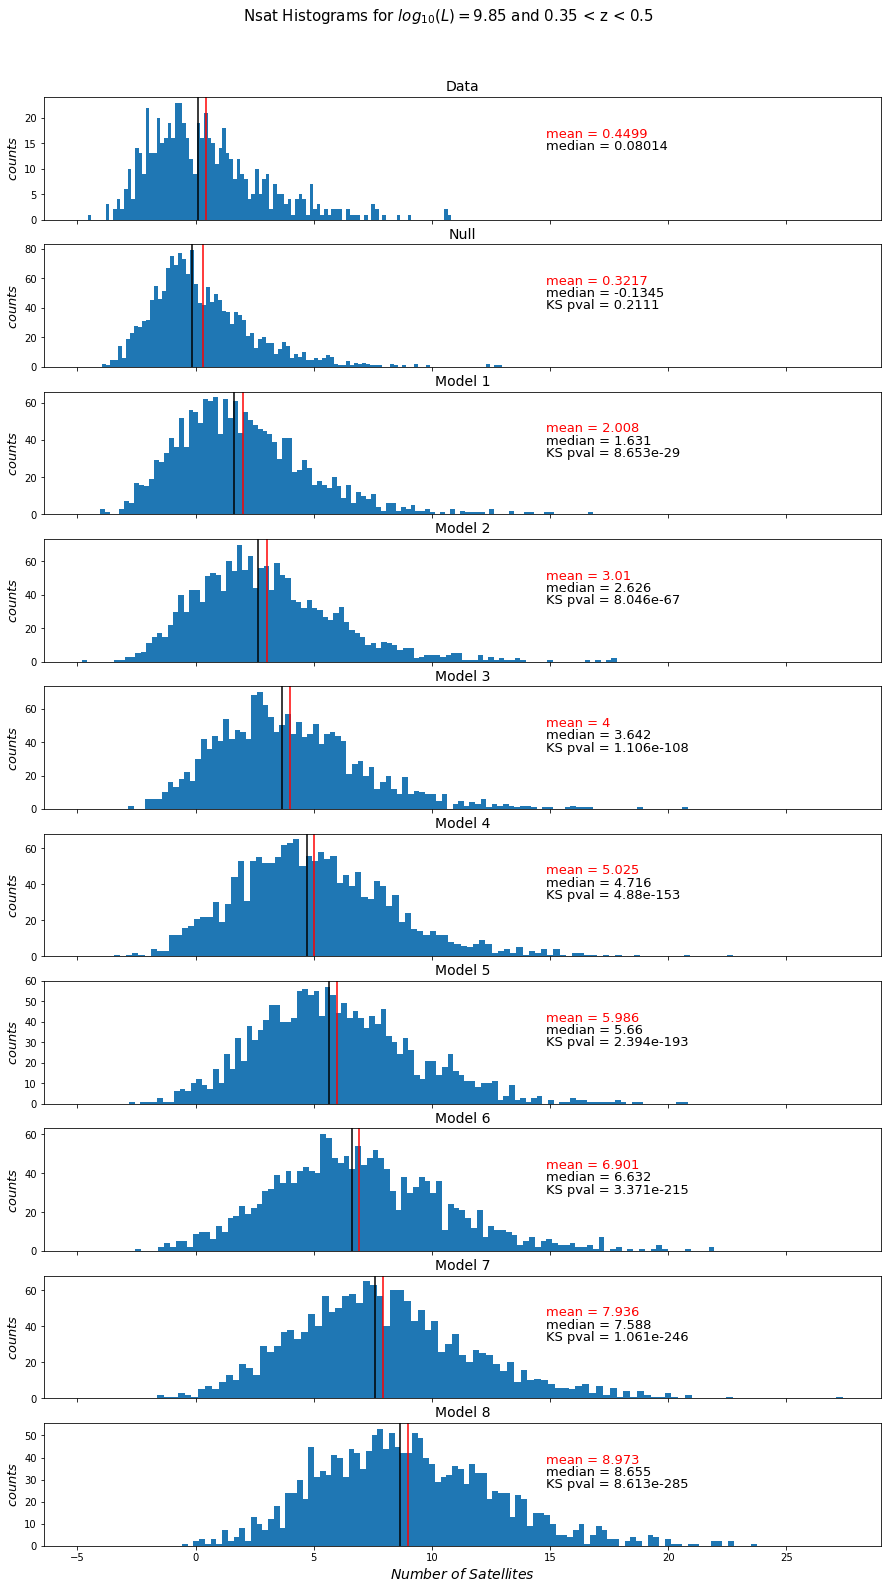

In [59]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15,25), sharex=True)
fig.suptitle('Nsat Histograms for $log_{10}(L)=9.85$ and 0.35 < z < 0.5', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(sum05, bins=100)
ax1.set_title('Data', fontsize=14)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=mean05, color='r')
ax1.axvline(x=median05, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(median05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(null_sum05, bins=100)
ax2.set_title('Null', fontsize=14)
# ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax2.set_ylabel(r'$counts$', fontsize=13)
ax2.axvline(x=null_mean05, color='r')
ax2.axvline(x=null_median05, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

ax3.hist(sum05_mod1, bins=100)
ax3.set_title('Model 1', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax3.set_ylabel(r'$counts$', fontsize=13)
ax3.axvline(x=mean05_mod1, color='r')
ax3.axvline(x=median05_mod1, color='black')
ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

ax4.hist(sum05_mod2, bins=100)
ax4.set_title('Model 2', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax4.set_ylabel(r'$counts$', fontsize=13)
ax4.axvline(x=mean05_mod2, color='r')
ax4.axvline(x=median05_mod2, color='black')
ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)

ax5.hist(sum05_mod3, bins=100)
ax5.set_title('Model 3', fontsize=14)
# ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax5.set_ylabel(r'$counts$', fontsize=13)
ax5.axvline(x=mean05_mod3, color='r')
ax5.axvline(x=median05_mod3, color='black')
ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

ax6.hist(sum05_mod4, bins=100)
ax6.set_title('Model 4', fontsize=14)
# ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax6.set_ylabel(r'$counts$', fontsize=13)
ax6.axvline(x=mean05_mod4, color='r')
ax6.axvline(x=median05_mod4, color='black')
ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

ax7.hist(sum05_mod5, bins=100)
ax7.set_title('Model 5', fontsize=14)
# ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax7.set_ylabel(r'$counts$', fontsize=13)
ax7.axvline(x=mean05_mod5, color='r')
ax7.axvline(x=median05_mod5, color='black')
ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

ax8.hist(sum05_mod6, bins=100)
ax8.set_title('Model 6', fontsize=14)
# ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax8.set_ylabel(r'$counts$', fontsize=13)
ax8.axvline(x=mean05_mod6, color='r')
ax8.axvline(x=median05_mod6, color='black')
ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

ax9.hist(sum05_mod7, bins=100)
ax9.set_title('Model 7', fontsize=14)
# ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax9.set_ylabel(r'$counts$', fontsize=13)
ax9.axvline(x=mean05_mod7, color='r')
ax9.axvline(x=median05_mod7, color='black')
ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

ax10.hist(sum05_mod8, bins=100)
ax10.set_title('Model 8', fontsize=14)
ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax10.set_ylabel(r'$counts$', fontsize=13)
ax10.axvline(x=mean05_mod8, color='r')
ax10.axvline(x=median05_mod8, color='black')
ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean05_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(median05_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/PaperPlots/highz05-model-comparison-EDR.pdf')

plt.show()

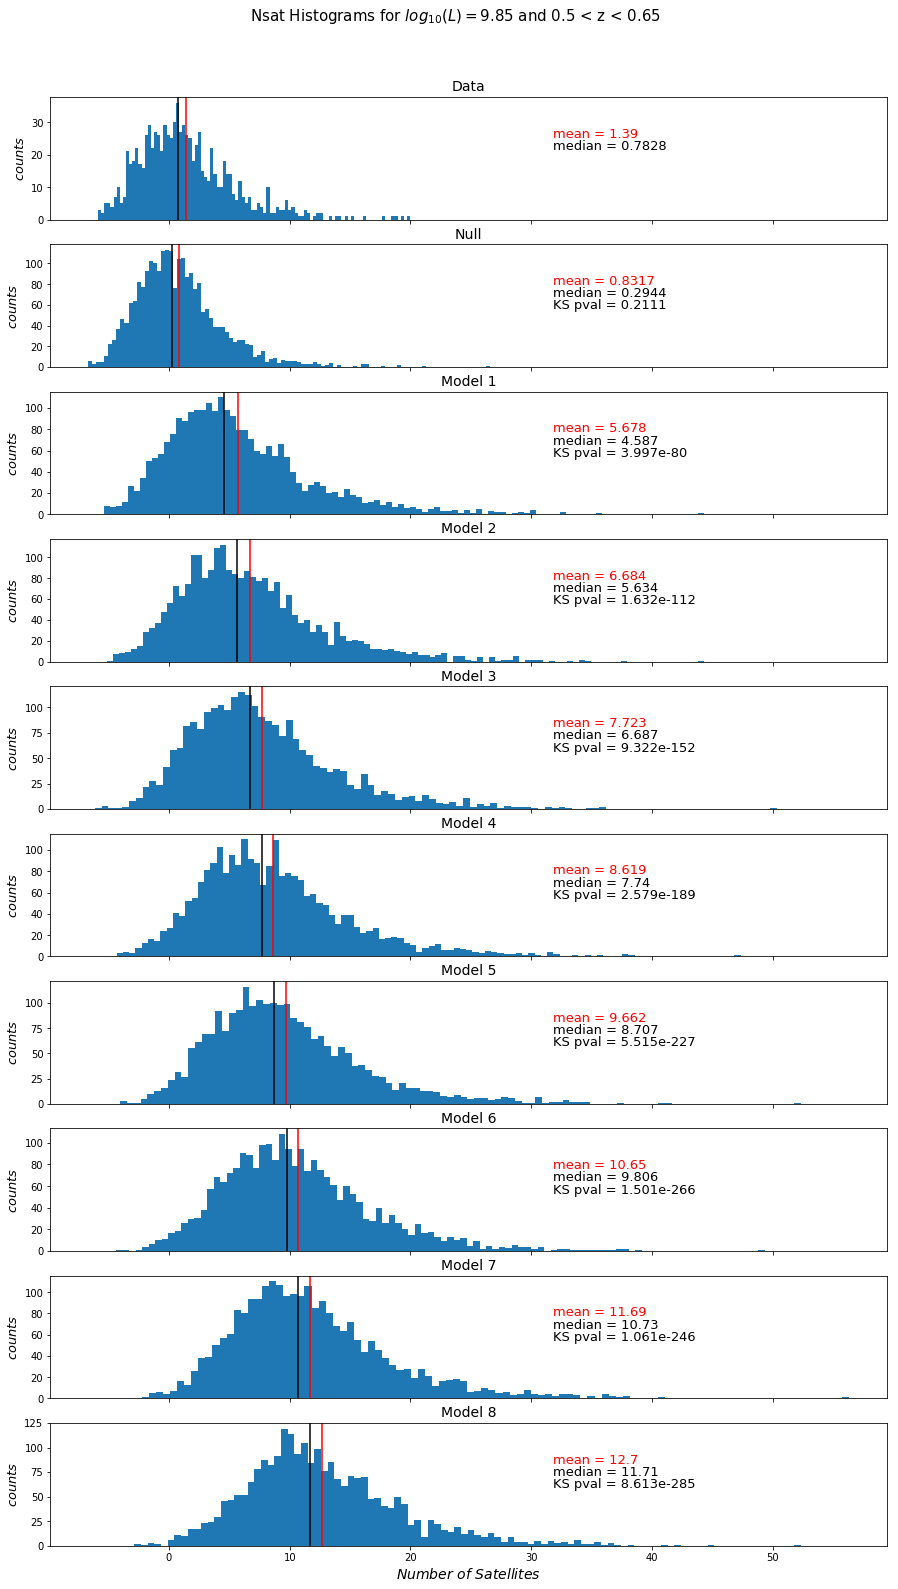

In [61]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15,25), sharex=True)
fig.suptitle('Nsat Histograms for $log_{10}(L)=9.85$ and 0.5 < z < 0.65', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(sum65, bins=100)
ax1.set_title('Data', fontsize=14)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=mean65, color='r')
ax1.axvline(x=median65, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(median65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(null_sum65, bins=100)
ax2.set_title('Null', fontsize=14)
# ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax2.set_ylabel(r'$counts$', fontsize=13)
ax2.axvline(x=null_mean65, color='r')
ax2.axvline(x=null_median65, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

ax3.hist(sum65_mod1, bins=100)
ax3.set_title('Model 1', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax3.set_ylabel(r'$counts$', fontsize=13)
ax3.axvline(x=mean65_mod1, color='r')
ax3.axvline(x=median65_mod1, color='black')
ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

ax4.hist(sum65_mod2, bins=100)
ax4.set_title('Model 2', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax4.set_ylabel(r'$counts$', fontsize=13)
ax4.axvline(x=mean65_mod2, color='r')
ax4.axvline(x=median65_mod2, color='black')
ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)

ax5.hist(sum65_mod3, bins=100)
ax5.set_title('Model 3', fontsize=14)
# ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax5.set_ylabel(r'$counts$', fontsize=13)
ax5.axvline(x=mean65_mod3, color='r')
ax5.axvline(x=median65_mod3, color='black')
ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

ax6.hist(sum65_mod4, bins=100)
ax6.set_title('Model 4', fontsize=14)
# ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax6.set_ylabel(r'$counts$', fontsize=13)
ax6.axvline(x=mean65_mod4, color='r')
ax6.axvline(x=median65_mod4, color='black')
ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

ax7.hist(sum65_mod5, bins=100)
ax7.set_title('Model 5', fontsize=14)
# ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax7.set_ylabel(r'$counts$', fontsize=13)
ax7.axvline(x=mean65_mod5, color='r')
ax7.axvline(x=median65_mod5, color='black')
ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

ax8.hist(sum65_mod6, bins=100)
ax8.set_title('Model 6', fontsize=14)
# ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax8.set_ylabel(r'$counts$', fontsize=13)
ax8.axvline(x=mean65_mod6, color='r')
ax8.axvline(x=median65_mod6, color='black')
ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval65_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

ax9.hist(sum65_mod7, bins=100)
ax9.set_title('Model 7', fontsize=14)
# ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax9.set_ylabel(r'$counts$', fontsize=13)
ax9.axvline(x=mean65_mod7, color='r')
ax9.axvline(x=median65_mod7, color='black')
ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

ax10.hist(sum65_mod8, bins=100)
ax10.set_title('Model 8', fontsize=14)
ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax10.set_ylabel(r'$counts$', fontsize=13)
ax10.axvline(x=mean65_mod8, color='r')
ax10.axvline(x=median65_mod8, color='black')
ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(mean65_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(median65_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval05_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/PaperPlots/highz65-model-comparison-EDR.pdf')

plt.show()